In [127]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import duckdb
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.api import OLS
from scipy.stats import bootstrap
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# when cleaning STARTS

In [128]:
#loading poverty data
poverty_df = pd.read_csv('data/poverty.csv')
print(poverty_df)

                                             Unnamed: 0        Unnamed: 1  \
0     Table 19. Number of Poor and Poverty Rate by S...               NaN   
1     (Population in thousands. Population as of Mar...               NaN   
2                                                  2023               NaN   
3                                                 State  Total population   
4                                               Alabama             4,995   
...                                                 ...               ...   
2437                                      West Virginia             1,952   
2438                                          Wisconsin             4,724   
2439                                            Wyoming               468   
2440  Source: U.S. Census Bureau, Current Population...               NaN   
2441  Footnotes are available at <www.census.gov/top...               NaN   

             Unnamed: 2                Unnamed: 3          Unnamed: 4  \
0 

In [129]:
#loading poverty data
poverty_df = pd.read_csv('data/poverty.csv')
#print(poverty_df)
#cleaning the first few rows that are just words
poverty_df = poverty_df.drop([0, 1])

poverty_df.rename(columns={'Unnamed: 0':'State',
                           'Unnamed: 1': 'TotalPop',
                           'Unnamed: 2':'PovertyTotal',
                           'Unnamed: 3':'Margin_1',
                           'Unnamed: 4': 'PovertyPercent',
                           'Unnamed: 5': "Margin_2"}, inplace=True)
#print(poverty_df.columns)
#cutting off any row that is not between 2013 and 2018
index_2018 = poverty_df[poverty_df['State'] == '2018'].index[0]
index_2017 = poverty_df[poverty_df['State'] == '2017 (3)'].index[0]
#print(index_2018)
#print(index_2017)


In [130]:
poverty_2018 = poverty_df[index_2018:index_2017-2]
print(poverty_2018.head())
print(poverty_2018.tail())

          State TotalPop PovertyTotal Margin_1 PovertyPercent Margin_2
269     Alabama    4,877          779      107           16.0      2.1
270      Alaska      720           94       15           13.1      2.0
271     Arizona    7,241          929      132           12.8      1.8
272    Arkansas    2,912          462       63           15.9      2.1
273  California   39,150        4,664      303           11.9      0.8
             State TotalPop PovertyTotal Margin_1 PovertyPercent Margin_2
315       Virginia    8,393          821      141            9.8      1.6
316     Washington    7,555          647      166            8.6      2.1
317  West Virginia    1,762          279       35           15.9      2.0
318      Wisconsin    5,795          499       89            8.6      1.5
319        Wyoming      565           53       10            9.5      1.8


In [131]:
index_2017 = poverty_df[poverty_df['State'] == '2017'].index[0]
index_2016 = poverty_df[poverty_df['State'] == '2016'].index[0]
print(index_2017)
print(index_2016)
poverty_2017 = poverty_df[index_2017:index_2016-2]
print(poverty_2017.tail())

373
426
             State TotalPop PovertyTotal Margin_1 PovertyPercent Margin_2
421       Virginia    8,249          847      127           10.3      1.5
422     Washington    7,431          736      104            9.9      1.5
423  West Virginia    1,794          311       46           17.3      2.5
424      Wisconsin    5,808          551       71            9.5      1.2
425        Wyoming      560           70       13           12.4      2.3


In [132]:
index_2015 = poverty_df[poverty_df['State'] == '2015'].index[0]

poverty_2016 = poverty_df[index_2016:index_2015-2]
print(poverty_2016.head())
print(poverty_2016.tail())

          State TotalPop PovertyTotal Margin_1 PovertyPercent Margin_2
428     Alabama    4,821          782      104           16.2      2.1
429      Alaska      708           89       20           12.6      2.8
430     Arizona    6,878        1,108      130           16.1      1.8
431    Arkansas    2,941          471       46           16.0      1.5
432  California   39,140        5,435      288           13.9      0.7
             State TotalPop PovertyTotal Margin_1 PovertyPercent Margin_2
474       Virginia    8,163          929      137           11.4      1.6
475     Washington    7,289          800       99           11.0      1.3
476  West Virginia    1,808          326       51           18.0      2.8
477      Wisconsin    5,764          620       84           10.7      1.5
478        Wyoming      571           62       12           10.9      2.0


In [133]:
index_2014 = poverty_df[poverty_df['State'] == '2014'].index[0]

poverty_2015 = poverty_df[index_2015:index_2014-2]
print(poverty_2015.head())
print(poverty_2015.tail())

          State TotalPop PovertyTotal Margin_1 PovertyPercent Margin_2
481     Alabama    4,820          784       99           16.3      2.0
482      Alaska      703           65       10            9.2      1.5
483     Arizona    6,728        1,156      138           17.2      2.1
484    Arkansas    2,951          475       44           16.1      1.5
485  California   39,080        5,441      347           13.9      0.8
             State TotalPop PovertyTotal Margin_1 PovertyPercent Margin_2
527       Virginia    8,216          894      133           10.9      1.6
528     Washington    7,193          819       89           11.4      1.3
529  West Virginia    1,795          261       76           14.5      4.3
530      Wisconsin    5,736          654      112           11.4      2.0
531        Wyoming      574           56       13            9.8      2.3


In [134]:
index_2013 = poverty_df[poverty_df['State'] == '2013 (4)'].index[0]
poverty_2014 = poverty_df[index_2014:index_2013-2]
print(poverty_2014.head())
print(poverty_2014.tail())

          State TotalPop PovertyTotal Margin_1 PovertyPercent Margin_2
534     Alabama    4,765          848       87           17.8      1.8
535      Alaska      694           82       13           11.9      2.0
536     Arizona    6,657        1,409      125           21.2      1.8
537    Arkansas    2,891          532       72           18.4      2.5
538  California   38,670        6,112      359           15.8      1.0
             State TotalPop PovertyTotal Margin_1 PovertyPercent Margin_2
580       Virginia    8,257          842      120           10.2      1.5
581     Washington    7,079          852      135           12.0      2.0
582  West Virginia    1,822          376       49           20.6      2.8
583      Wisconsin    5,742          628       90           10.9      1.6
584        Wyoming      572           55       10            9.7      1.8


In [135]:
index_2013 = poverty_df[poverty_df['State'] == '2013 (5)'].index[0]
index_2012 = poverty_df[poverty_df['State'] == '2012'].index[0]
poverty_2013 = poverty_df[index_2013:index_2012-2]
print(poverty_2013.head())
print(poverty_2013.tail())

          State TotalPop PovertyTotal Margin_1 PovertyPercent Margin_2
640     Alabama    4,751          796      110           16.7      2.3
641      Alaska      696           76       20           10.9      2.8
642     Arizona    6,645        1,345      153           20.2      2.3
643    Arkansas    2,940          504      114           17.1      3.9
644  California   38,050        5,675      352           14.9      1.0
             State TotalPop PovertyTotal Margin_1 PovertyPercent Margin_2
686       Virginia    8,174          854      165           10.4      2.0
687     Washington    6,854          819      133           12.0      2.0
688  West Virginia    1,823          315       58           17.3      3.1
689      Wisconsin    5,625          618      115           11.0      2.0
690        Wyoming      578           68       10           11.8      1.8


In [136]:
poverty_2018 = poverty_2018.copy()
poverty_2018['Year'] = 2018
poverty_2017 = poverty_2017.copy()
poverty_2017['Year'] = 2017
poverty_2016= poverty_2016.copy()
poverty_2016['Year'] = 2016
poverty_2015 = poverty_2015.copy()
poverty_2015['Year'] = 2015
poverty_2014 = poverty_2014.copy()
poverty_2014['Year'] = 2014
poverty_2013 = poverty_2013.copy()
poverty_2013['Year'] = 2013

poverty_concat = pd.concat([poverty_2013, poverty_2014, poverty_2015, \
                            poverty_2016, poverty_2017, poverty_2018], axis=0)
poverty_concat.reset_index(inplace=True, drop=True)
print(poverty_concat)


             State TotalPop PovertyTotal Margin_1 PovertyPercent Margin_2  \
0          Alabama    4,751          796      110           16.7      2.3   
1           Alaska      696           76       20           10.9      2.8   
2          Arizona    6,645        1,345      153           20.2      2.3   
3         Arkansas    2,940          504      114           17.1      3.9   
4       California   38,050        5,675      352           14.9      1.0   
..             ...      ...          ...      ...            ...      ...   
301       Virginia    8,393          821      141            9.8      1.6   
302     Washington    7,555          647      166            8.6      2.1   
303  West Virginia    1,762          279       35           15.9      2.0   
304      Wisconsin    5,795          499       89            8.6      1.5   
305        Wyoming      565           53       10            9.5      1.8   

     Year  
0    2013  
1    2013  
2    2013  
3    2013  
4    2013  
.. 

In [137]:
poverty_concat['PovertyTotal'] = poverty_concat.PovertyTotal.str.replace(",", '').astype(int)
poverty_concat['Margin_1'] = poverty_concat['Margin_1'].astype(float)
poverty_concat['Margin_2'] = poverty_concat['Margin_2'].astype(float)
poverty_concat['PovertyPercent'] = poverty_concat['PovertyPercent'].astype(float)
poverty_concat['TotalPop'] = poverty_concat.TotalPop.str.replace(",", '').astype(int)
poverty_concat.dtypes

State              object
TotalPop            int64
PovertyTotal        int64
Margin_1          float64
PovertyPercent    float64
Margin_2          float64
Year                int64
dtype: object

In [138]:
income_df = pd.read_csv("data/income.csv")
income_df.iloc[:, 20:].head(5)


,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,...,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2010 (37),NaN,2009 (36),NaN,2008,NaN,2007,NaN,2006,...,1988,NaN,1987 (21),NaN,1986,NaN,1985 (20),NaN,1984 (19),NaN
4,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,...,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror


In [139]:
income_df.drop(columns={'Unnamed: 12','Unnamed: 10','Unnamed: 8',\
                        'Unnamed: 6', 'Unnamed: 4', 'Unnamed: 2' , 'Unnamed: 3',\
                          'Unnamed: 14', 'Unnamed: 16', 'Unnamed: 18', 'Unnamed: 20',\
                            'Unnamed: 22', 'Unnamed: 24', 'Unnamed: 26', 'Unnamed: 28', 'Unnamed: 30',
                            'Unnamed: 32', 'Unnamed: 34', 'Unnamed: 36',\
                            'Unnamed: 38', 'Unnamed: 40', 'Unnamed: 42', 'Unnamed: 44', 'Unnamed: 46',\
                              'Unnamed: 48', 'Unnamed: 50', 'Unnamed: 52', 'Unnamed: 54',\
                                'Unnamed: 56', 'Unnamed: 58', 'Unnamed: 60', 'Unnamed: 62',\
                                  'Unnamed: 64', 'Unnamed: 66', 'Unnamed: 68', 'Unnamed: 70',\
                                    'Unnamed: 72', 'Unnamed: 74'}, inplace=True)
print(income_df.columns)
(income_df.iloc[3:, :]).head()

Index(['Table with row headers in column A and column headers in rows 5 and 6, and 60 and 61',
       'Unnamed: 1', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9', 'Unnamed: 11',
       'Unnamed: 13', 'Unnamed: 15', 'Unnamed: 17', 'Unnamed: 19',
       'Unnamed: 21', 'Unnamed: 23', 'Unnamed: 25', 'Unnamed: 27',
       'Unnamed: 29', 'Unnamed: 31', 'Unnamed: 33', 'Unnamed: 35',
       'Unnamed: 37', 'Unnamed: 39', 'Unnamed: 41', 'Unnamed: 43',
       'Unnamed: 45', 'Unnamed: 47', 'Unnamed: 49', 'Unnamed: 51',
       'Unnamed: 53', 'Unnamed: 55', 'Unnamed: 57', 'Unnamed: 59',
       'Unnamed: 61', 'Unnamed: 63', 'Unnamed: 65', 'Unnamed: 67',
       'Unnamed: 69', 'Unnamed: 71', 'Unnamed: 73'],
      dtype='object')


,"Table with row headers in column A and column headers in rows 5 and 6, and 60 and 61",Unnamed: 1,Unnamed: 5,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,...,Unnamed: 55,Unnamed: 57,Unnamed: 59,Unnamed: 61,Unnamed: 63,Unnamed: 65,Unnamed: 67,Unnamed: 69,Unnamed: 71,Unnamed: 73
3,State,2018,2017,2016,2015,2014,2013 (39),2013 (38),2012,2011,...,1993 (23),1992 (22),1991,1990,1989,1988,1987 (21),1986,1985 (20),1984 (19)
4,NaN,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,...,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome
5,United States,"63,179","61,372","59,039","56,516","53,657","53,585","51,939","51,017","50,054",...,"31,241","30,636","30,126","29,943","28,906","27,225","26,061","24,897","23,618","22,415"
6,Alabama,"49,936","51,113","47,221","44,509","42,278","47,320","41,381","43,464","42,590",...,"25,082","25,808","24,346","23,357","21,284","19,948","19,734","19,132","18,333","17,310"
7,Alaska,"68,734","72,231","75,723","75,112","67,629","72,472","61,137","63,648","57,431",...,"42,931","41,802","40,612","39,298","36,006","33,103","33,233","31,356","34,782","32,356"


In [140]:
income_df = income_df.iloc[3:, :]
income_df.head()

,"Table with row headers in column A and column headers in rows 5 and 6, and 60 and 61",Unnamed: 1,Unnamed: 5,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,...,Unnamed: 55,Unnamed: 57,Unnamed: 59,Unnamed: 61,Unnamed: 63,Unnamed: 65,Unnamed: 67,Unnamed: 69,Unnamed: 71,Unnamed: 73
3,State,2018,2017,2016,2015,2014,2013 (39),2013 (38),2012,2011,...,1993 (23),1992 (22),1991,1990,1989,1988,1987 (21),1986,1985 (20),1984 (19)
4,NaN,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,...,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome
5,United States,"63,179","61,372","59,039","56,516","53,657","53,585","51,939","51,017","50,054",...,"31,241","30,636","30,126","29,943","28,906","27,225","26,061","24,897","23,618","22,415"
6,Alabama,"49,936","51,113","47,221","44,509","42,278","47,320","41,381","43,464","42,590",...,"25,082","25,808","24,346","23,357","21,284","19,948","19,734","19,132","18,333","17,310"
7,Alaska,"68,734","72,231","75,723","75,112","67,629","72,472","61,137","63,648","57,431",...,"42,931","41,802","40,612","39,298","36,006","33,103","33,233","31,356","34,782","32,356"


In [141]:
income_df.iloc[:, 5:]

,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,Unnamed: 21,Unnamed: 23,Unnamed: 25,Unnamed: 27,Unnamed: 29,...,Unnamed: 55,Unnamed: 57,Unnamed: 59,Unnamed: 61,Unnamed: 63,Unnamed: 65,Unnamed: 67,Unnamed: 69,Unnamed: 71,Unnamed: 73
3,2014,2013 (39),2013 (38),2012,2011,2010 (37),2009 (36),2008,2007,2006,...,1993 (23),1992 (22),1991,1990,1989,1988,1987 (21),1986,1985 (20),1984 (19)
4,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,...,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome
5,"53,657","53,585","51,939","51,017","50,054","49,276","49,777","50,303","50,233","48,201",...,"31,241","30,636","30,126","29,943","28,906","27,225","26,061","24,897","23,618","22,415"
6,"42,278","47,320","41,381","43,464","42,590","40,933","39,980","44,476","42,212","37,952",...,"25,082","25,808","24,346","23,357","21,284","19,948","19,734","19,132","18,333","17,310"
7,"67,629","72,472","61,137","63,648","57,431","57,848","61,604","63,989","62,993","56,418",...,"42,931","41,802","40,612","39,298","36,006","33,103","33,233","31,356","34,782","32,356"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,"61,665","55,849","59,663","58,159","58,248","58,114","60,112","59,860","62,253","64,536",...,"54,511","58,598","56,134","57,387","57,103","60,525","55,913","57,970","51,879","47,882"
111,"59,128","72,817","60,140","63,016","60,991","60,249","61,559","62,359","59,178","58,730",...,"50,523","53,146","52,378","55,050","57,884","54,066","58,502","51,673","49,279","54,976"
112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
income_df.rename(columns = {'Table with row headers in column A and column headers in rows 5 and 6, and 60 and 61':'State',
                            'Unnamed: 1': '2018', 'Unnamed: 5': '2017',\
                            'Unnamed: 7': '2016', 'Unnamed: 9': '2015' , \
                                'Unnamed: 11': '2014', 'Unnamed: 13': '2013',\
                                   'Unnamed: 15': '2013', 'Unnamed: 17': '2012', 'Unnamed: 19': '2011', \
                                     'Unnamed: 21': '2010', 'Unnamed: 23': '2009', 'Unnamed: 25': '2008',\
                                         'Unnamed: 27': '2007', 'Unnamed: 29': '2006', 'Unnamed: 31': '2005',\
                                              'Unnamed: 33': '2004', 'Unnamed: 35': '2003', 'Unnamed: 37': '2002', 'Unnamed: 39': '2001',\
                                                  'Unnamed: 41': '2000', 'Unnamed: 43': '1999', 'Unnamed: 45': '1998', \
                                                      'Unnamed: 47': '1997', 'Unnamed: 49': '1996', 'Unnamed: 51': '1995',\
                                                          'Unnamed: 53': '1994', 'Unnamed: 55': '1993', 'Unnamed: 57': '1992',\
                                                              'Unnamed: 59': '1991', 'Unnamed: 61': '1990', 'Unnamed: 63': '1989'}, inplace=True)
income_df.rename(columns = {'Unnamed: 65': '1988', 'Unnamed: 67': '1987', 'Unnamed: 69': '1986', 'Unnamed: 71': '1985',\
                            'Unnamed: 73': '1984'}, inplace=True)
income_df.reset_index(inplace=True, drop= True)
income_df.head()

,State,2018,2017,2016,2015,2014,2013,2013,2012,2011,...,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984
0,State,2018,2017,2016,2015,2014,2013 (39),2013 (38),2012,2011,...,1993 (23),1992 (22),1991,1990,1989,1988,1987 (21),1986,1985 (20),1984 (19)
1,NaN,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,...,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome
2,United States,"63,179","61,372","59,039","56,516","53,657","53,585","51,939","51,017","50,054",...,"31,241","30,636","30,126","29,943","28,906","27,225","26,061","24,897","23,618","22,415"
3,Alabama,"49,936","51,113","47,221","44,509","42,278","47,320","41,381","43,464","42,590",...,"25,082","25,808","24,346","23,357","21,284","19,948","19,734","19,132","18,333","17,310"
4,Alaska,"68,734","72,231","75,723","75,112","67,629","72,472","61,137","63,648","57,431",...,"42,931","41,802","40,612","39,298","36,006","33,103","33,233","31,356","34,782","32,356"


In [143]:
income_df = income_df.iloc[3:54, :]
income_df.reset_index(inplace=True, drop = True)
#print(income_df.head())
income_df.head(7)

,State,2018,2017,2016,2015,2014,2013,2013,2012,2011,...,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984
0,Alabama,"49,936","51,113","47,221","44,509","42,278","47,320","41,381","43,464","42,590",...,"25,082","25,808","24,346","23,357","21,284","19,948","19,734","19,132","18,333","17,310"
1,Alaska,"68,734","72,231","75,723","75,112","67,629","72,472","61,137","63,648","57,431",...,"42,931","41,802","40,612","39,298","36,006","33,103","33,233","31,356","34,782","32,356"
2,Arizona,"62,283","61,125","57,100","52,248","49,254","52,611","50,602","47,044","48,621",...,"30,510","29,358","30,737","29,224","28,552","26,435","26,749","25,500","23,877","21,425"
3,Arkansas,"49,781","48,829","45,907","42,798","44,922","39,376","39,919","39,018","41,302",...,"23,039","23,882","23,435","22,786","21,433","20,172","18,827","18,730","17,451","15,674"
4,California,"70,489","69,759","66,637","63,636","60,487","60,794","57,528","57,020","53,367",...,"34,073","34,903","33,664","33,290","33,009","30,287","30,146","29,010","26,981","25,287"
5,Colorado,"73,034","74,172","70,566","66,596","60,940","67,912","63,371","57,255","58,629",...,"34,488","32,484","31,499","30,733","26,806","26,214","26,476","27,192","28,182","25,801"
6,Connecticut,"72,812","72,780","75,923","72,889","70,161","69,291","67,781","64,247","65,415",...,"39,516","40,841","42,154","38,870","42,321","36,213","32,862","32,721","31,090","29,951"


In [144]:
income_df.tail(7)

,State,2018,2017,2016,2015,2014,2013,2013,2012,2011,...,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984
44,Utah,"77,067","71,319","67,481","66,258","63,383","61,047","62,967","58,341","55,493",...,"35,786","34,251","28,016","30,142","30,717","26,313","26,529","26,281","25,238","23,057"
45,Vermont,"70,066","63,805","60,837","59,494","60,708","65,513","54,842","55,582","51,862",...,"31,065","32,755","29,155","31,098","31,295","28,988","25,415","24,599","26,000","22,578"
46,Virginia,"77,151","71,293","66,451","61,486","66,155","65,907","67,620","64,632","62,616",...,"36,433","38,198","36,137","35,073","34,118","32,648","29,996","29,715","28,429","26,525"
47,Washington,"79,726","75,418","70,310","67,243","59,068","63,922","60,106","62,187","56,850",...,"35,655","33,900","33,970","32,112","31,961","32,327","27,319","26,881","24,000","25,017"
48,West Virginia,"50,573","45,392","44,354","42,824","39,552","43,069","40,241","43,553","41,821",...,"22,421","20,271","23,147","22,137","21,677","19,353","17,207","16,464","15,983","16,843"
49,Wisconsin,"62,629","63,451","59,817","55,425","58,080","51,726","55,258","53,079","52,058",...,"31,766","33,308","31,133","30,711","29,123","29,575","26,369","26,430","23,246","20,743"
50,Wyoming,"62,539","57,837","57,829","60,925","55,690","67,441","55,700","57,512","54,509",...,"29,442","30,209","29,050","29,460","29,521","26,419","27,590","23,559","22,081","23,816"


In [145]:
'''for c in (income_df.columns.array)[1:]:
  income_df[c] = income_df[c].str.replace(',', '').astype(float)
income_df.dtypes
'''
income_df = income_df.replace(',', '', regex = True)
for c in (income_df.columns.array)[1:]:
  income_df[c] = income_df[c].astype(float)
#income_df.dtypes
income_df.head()

,State,2018,2017,2016,2015,2014,2013,2013,2012,2011,...,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984
0,Alabama,49936.0,51113.0,47221.0,44509.0,42278.0,47320.0,41381.0,43464.0,42590.0,...,25082.0,25808.0,24346.0,23357.0,21284.0,19948.0,19734.0,19132.0,18333.0,17310.0
1,Alaska,68734.0,72231.0,75723.0,75112.0,67629.0,72472.0,61137.0,63648.0,57431.0,...,42931.0,41802.0,40612.0,39298.0,36006.0,33103.0,33233.0,31356.0,34782.0,32356.0
2,Arizona,62283.0,61125.0,57100.0,52248.0,49254.0,52611.0,50602.0,47044.0,48621.0,...,30510.0,29358.0,30737.0,29224.0,28552.0,26435.0,26749.0,25500.0,23877.0,21425.0
3,Arkansas,49781.0,48829.0,45907.0,42798.0,44922.0,39376.0,39919.0,39018.0,41302.0,...,23039.0,23882.0,23435.0,22786.0,21433.0,20172.0,18827.0,18730.0,17451.0,15674.0
4,California,70489.0,69759.0,66637.0,63636.0,60487.0,60794.0,57528.0,57020.0,53367.0,...,34073.0,34903.0,33664.0,33290.0,33009.0,30287.0,30146.0,29010.0,26981.0,25287.0


## Cleaning crime until 1979

In [146]:
#loading crime data
crime_df = pd.read_csv('data/crime.csv')
crime_df.iloc[:, 2:]

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
1,NaN,220099000,1208030,21460,76390,NaN,480700,629480,11041500,3327700,6601000,1112800,NaN
2,Alaska,406000,1994,54,292,NaN,445,1203,23193,5616,15076,2501,NaN
3,Alabama,3769000,15578,496,1037,NaN,4127,9918,144372,48517,83791,12064,NaN
4,Arkansas,2180000,7984,198,595,NaN,1626,5565,70949,21457,45267,4225,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332,NaN,"8,715,698","20,589",520,NaN,"2,595","3,283","14,191","144,566","10,665","118,839","15,062",NaN
2333,NaN,"7,812,880","27,909",373,NaN,"2,917","6,416","18,203","225,535","37,583","134,730","53,222",NaN
2334,NaN,"1,770,071","4,699",87,NaN,823,199,"3,590","21,153","3,156","16,355","1,642",NaN
2335,NaN,"5,910,955","17,057",283,NaN,"2,156","2,285","12,333","71,929","7,619","54,374","9,936",NaN


In [147]:
#see what the names of each column are without any edits to the csv
print(crime_df.columns)

#rename the columns we want with proper names
crime_df.rename(columns={
    'estimated_crimes_1979_2023': 'Year',
    'Unnamed: 1': 'State_Abbreviation',
    'Unnamed: 2': 'State_Name',
    'Unnamed: 3': 'Population',
    'Unnamed: 4': 'Violent_Crime',
    'Unnamed: 5': 'Homicide',
    'Unnamed: 6': 'Rape',
    'Unnamed: 7': 'Rape_Revised',
    'Unnamed: 8': 'Robbery',
    'Unnamed: 9': 'Aggravated_Assault',
    'Unnamed: 10': 'Property_Crime',
    'Unnamed: 11': 'Burglary',
    'Unnamed: 12': 'Larceny',
    'Unnamed: 13': 'Vehicle_Theft',

},inplace=True)

#drop columns that will not be used during the analysis
crime_df = crime_df.drop(columns=['Unnamed: 14'])
crime_df

Index(['estimated_crimes_1979_2023', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')


,Year,State_Abbreviation,State_Name,Population,Violent_Crime,Homicide,Rape,Rape_Revised,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny,Vehicle_Theft
0,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft
1,1979,NaN,NaN,220099000,1208030,21460,76390,NaN,480700,629480,11041500,3327700,6601000,1112800
2,1979,AK,Alaska,406000,1994,54,292,NaN,445,1203,23193,5616,15076,2501
3,1979,AL,Alabama,3769000,15578,496,1037,NaN,4127,9918,144372,48517,83791,12064
4,1979,AR,Arkansas,2180000,7984,198,595,NaN,1626,5565,70949,21457,45267,4225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332,2023,VA,NaN,"8,715,698","20,589",520,NaN,"2,595","3,283","14,191","144,566","10,665","118,839","15,062"
2333,2023,WA,NaN,"7,812,880","27,909",373,NaN,"2,917","6,416","18,203","225,535","37,583","134,730","53,222"
2334,2023,WV,NaN,"1,770,071","4,699",87,NaN,823,199,"3,590","21,153","3,156","16,355","1,642"
2335,2023,WI,NaN,"5,910,955","17,057",283,NaN,"2,156","2,285","12,333","71,929","7,619","54,374","9,936"


In [148]:
#dropping the first row (index 0) and reset the indexes.
# This way, I can turn the year from object to integer.
crime_df = crime_df.drop(index=0)

In [149]:
#if rape_Revised is na, take rape
na_rape_values = crime_df['Rape'].loc[crime_df['Rape_Revised'].isna()] #put this into rape_revised

crime_df['Rape_Revised'] = crime_df['Rape_Revised'].fillna(na_rape_values)

crime_df = crime_df.drop(columns = ['Rape'])

crime_df.rename(columns= {'Rape_Revised':'Rape'}, inplace=True)
crime_df.head()

,Year,State_Abbreviation,State_Name,Population,Violent_Crime,Homicide,Rape,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny,Vehicle_Theft
1,1979,NaN,NaN,220099000,1208030,21460,76390,480700,629480,11041500,3327700,6601000,1112800
2,1979,AK,Alaska,406000,1994,54,292,445,1203,23193,5616,15076,2501
3,1979,AL,Alabama,3769000,15578,496,1037,4127,9918,144372,48517,83791,12064
4,1979,AR,Arkansas,2180000,7984,198,595,1626,5565,70949,21457,45267,4225
5,1979,AZ,Arizona,2450000,14528,219,1120,4305,8884,177977,48916,116976,12085


In [150]:
# Reset the index
crime_df.reset_index(drop=True, inplace=True)

#making the year into an interger from an object
crime_df['Year']=crime_df['Year'].astype(int)

#shaping the data set so that we are only looking at years 2013 to 2018
crime_filtered_years = crime_df[(crime_df['Year'] >= 1979)]

# Drop rows where 'State_Abbreviation' or 'State_Name' is NaN
crime_filtered_years = crime_filtered_years.dropna(subset=['State_Abbreviation', 'State_Name'])
crime_filtered_years.reset_index(inplace=True, drop = True)
crime_filtered_years

,Year,State_Abbreviation,State_Name,Population,Violent_Crime,Homicide,Rape,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny,Vehicle_Theft
0,1979,AK,Alaska,406000,1994,54,292,445,1203,23193,5616,15076,2501
1,1979,AL,Alabama,3769000,15578,496,1037,4127,9918,144372,48517,83791,12064
2,1979,AR,Arkansas,2180000,7984,198,595,1626,5565,70949,21457,45267,4225
3,1979,AZ,Arizona,2450000,14528,219,1120,4305,8884,177977,48916,116976,12085
4,1979,CA,California,22696000,184087,2952,12239,75767,93129,1511021,496310,847148,167563
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,2022,VA,Virginia,"8,683,619","20,624",641,"2,791","3,360","13,832","148,845","10,944","123,805","14,096"
2240,2022,WA,Washington,"7,785,786","29,504",400,"3,208","6,766","19,130","262,437","43,987","168,550","49,900"
2241,2022,WV,West Virginia,"1,775,156","5,213",95,909,210,"3,999","23,663","3,561","18,428","1,674"
2242,2022,WI,Wisconsin,"5,892,539","17,889",322,"2,452","2,350","12,765","80,703","9,137","58,211","13,355"


In [151]:
crime_filtered_years= crime_filtered_years.replace(',', '', regex = True)

In [152]:
#changing and ensuring the types for each column's data
crime_filtered_years['Population'] = crime_filtered_years['Population'].astype(int)
crime_filtered_years['Rape'] = crime_filtered_years['Rape'].astype(int)
crime_filtered_years['Robbery'] = crime_filtered_years['Robbery'].astype(int)
crime_filtered_years['Aggravated_Assault'] = crime_filtered_years['Aggravated_Assault'].astype(int)
crime_filtered_years['Violent_Crime'] = crime_filtered_years['Violent_Crime'].astype(int)
crime_filtered_years['Homicide'] = crime_filtered_years['Homicide'].astype(int)
crime_filtered_years.dtypes

Year                   int64
State_Abbreviation    object
State_Name            object
Population             int64
Violent_Crime          int64
Homicide               int64
Rape                   int64
Robbery                int64
Aggravated_Assault     int64
Property_Crime        object
Burglary              object
Larceny               object
Vehicle_Theft         object
dtype: object

In [153]:
crime_filtered_years.rename(columns={'State_Name': 'State'}, inplace=True)
crime_df = crime_filtered_years
crime_df

,Year,State_Abbreviation,State,Population,Violent_Crime,Homicide,Rape,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny,Vehicle_Theft
0,1979,AK,Alaska,406000,1994,54,292,445,1203,23193,5616,15076,2501
1,1979,AL,Alabama,3769000,15578,496,1037,4127,9918,144372,48517,83791,12064
2,1979,AR,Arkansas,2180000,7984,198,595,1626,5565,70949,21457,45267,4225
3,1979,AZ,Arizona,2450000,14528,219,1120,4305,8884,177977,48916,116976,12085
4,1979,CA,California,22696000,184087,2952,12239,75767,93129,1511021,496310,847148,167563
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,2022,VA,Virginia,8683619,20624,641,2791,3360,13832,148845,10944,123805,14096
2240,2022,WA,Washington,7785786,29504,400,3208,6766,19130,262437,43987,168550,49900
2241,2022,WV,West Virginia,1775156,5213,95,909,210,3999,23663,3561,18428,1674
2242,2022,WI,Wisconsin,5892539,17889,322,2452,2350,12765,80703,9137,58211,13355


# Melt income_df; years from 1984 to 2018

In [154]:
income_melt = pd.melt(income_df, id_vars='State', var_name = 'Year', value_name='Median_Income')
income_melt['Year'] = income_melt['Year'].astype(int)
income_melt.head()

,State,Year,Median_Income
0,Alabama,2018,49936.0
1,Alaska,2018,68734.0
2,Arizona,2018,62283.0
3,Arkansas,2018,49781.0
4,California,2018,70489.0


# when cleaning STOPS

# Hypothesis 1 TRIALS (did not use in actual analysis)

# Robbery and Median Income for 1984 to 2018 using 1 coefficient. With Log.

In [155]:
income_robbery = duckdb.sql(''' SELECT I.State, Median_Income, Robbery, I.Year
                            FROM income_melt AS I JOIN crime_df AS C
                            ON I.Year = C.Year AND I.State = C.State AND I.Year<=2015
                            ORDER BY I.Year ASC''').df()
income_robbery

,State,Median_Income,Robbery,Year
0,Alabama,17310.0,3833,1984
1,Arkansas,15674.0,1587,1984
2,Arizona,21425.0,4003,1984
3,California,25287.0,83924,1984
4,Colorado,25801.0,3623,1984
...,...,...,...,...
1645,Wisconsin,55425.0,5234,2015
1646,West Virginia,42824.0,783,2015
1647,Wyoming,60925.0,59,2015
1648,Arkansas,42798.0,2117,2015


<Axes: xlabel='Median_Income', ylabel='Robbery'>

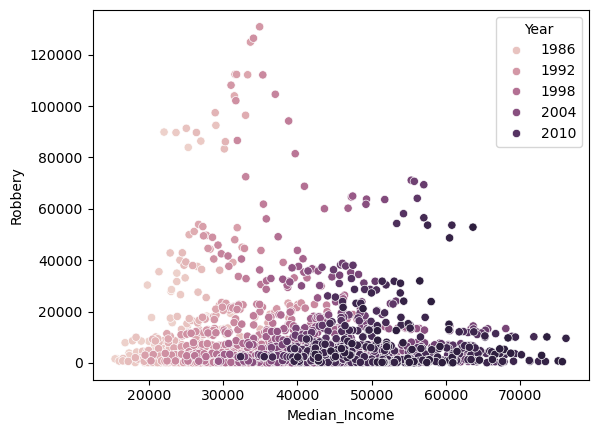

In [156]:
sns.scatterplot(data=income_robbery, x = 'Median_Income', y= 'Robbery', hue = "Year")

In [157]:
X = np.log(income_robbery['Median_Income'])
X = sm.add_constant(X)
Y = np.log(income_robbery['Robbery'])

model = sm.OLS(Y,X)
res = model.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Robbery   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.814
Date:                Thu, 21 Nov 2024   Prob (F-statistic):              0.178
Time:                        23:06:23   Log-Likelihood:                -3239.5
No. Observations:                1650   AIC:                             6483.
Df Residuals:                    1648   BIC:                             6494.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.1263      1.408      4.352

In [158]:
x_train = np.log(income_robbery['Median_Income'])
x_train= sm.add_constant(x_train)
y_train= Y

preds = res.predict(x_train)
np.log(y_train),preds

(0       2.110383
 1       1.997364
 2       2.115629
 3       2.428131
 4       2.103531
           ...   
 1645    2.147443
 1646    1.896590
 1647    1.405493
 1648    2.035719
 1649    2.154495
 Name: Robbery, Length: 1650, dtype: float64,
 0       7.879732
 1       7.861893
 2       7.918052
 3       7.947830
 4       7.951445
           ...   
 1645    8.088829
 1646    8.042485
 1647    8.105829
 1648    8.042376
 1649    8.055034
 Length: 1650, dtype: float64)

# Robbery and Median Income for 1984 to 2018 using 1 coefficient. Without Log.

In [159]:
X = income_robbery['Median_Income']
X = sm.add_constant(X)
Y = income_robbery['Robbery']

model = sm.OLS(Y,X)
res = model.fit()
print(X.shape)
print(res.summary())

(1650, 2)
                            OLS Regression Results                            
Dep. Variable:                Robbery   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.754
Date:                Thu, 21 Nov 2024   Prob (F-statistic):             0.0528
Time:                        23:06:23   Log-Likelihood:                -18305.
No. Observations:                1650   AIC:                         3.661e+04
Df Residuals:                    1648   BIC:                         3.663e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.183e+04   1344.039 

In [160]:
x_train = X
y_train= Y

preds = res.predict(x_train)
y_train,preds

(0        3833
 1        1587
 2        4003
 3       83924
 4        3623
         ...  
 1645     5234
 1646      783
 1647       59
 1648     2117
 1649     5561
 Name: Robbery, Length: 1650, dtype: int64,
 0       10751.461041
 1       10853.347718
 2       10495.187400
 3       10254.670074
 4       10222.659223
             ...     
 1645     8377.738124
 1646     9162.502193
 1647     8035.209565
 1648     9164.121418
 1649     8969.565197
 Length: 1650, dtype: float64)

# Robbery for year 2000 with X as median income when using only one coefficient

In [161]:
robbery_2000 = duckdb.sql(''' SELECT I.Median_Income, Robbery, I.Year
                          FROM income_melt AS I JOIN crime_df AS C
                          ON I.Year = C.Year AND I.State = C.State AND I.Year=2000
                          Order by I.Year ASC''').df()
robbery_2000.head()

,Median_Income,Robbery,Year
0,52847.0,490,2000
1,29697.0,2001,2000
2,39783.0,7504,2000
3,46816.0,60249,2000
4,48240.0,3034,2000


In [162]:
X_2000 = robbery_2000['Median_Income']
X_2000 = sm.add_constant(X_2000)
Y_2000 = robbery_2000['Robbery']

model_2000 = sm.OLS(Y_2000, X_2000)
fit_2000 = model_2000.fit()

fit_2000.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Robbery   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.6147
Date:                Thu, 21 Nov 2024   Prob (F-statistic):              0.437
Time:                        23:06:23   Log-Likelihood:                -538.33
No. Observations:                  50   AIC:                             1081.
Df Residuals:                      48   BIC:                             1084.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -380.1297   1.09e+04     -0.035      0.972   -2.24e+04    2.16e+04
Median_Income     0.2027      0.259      0.784      0.437      -0.317       0.723
==============================================================================
Omnibus:                       45.870   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.627
Skew:                           2.550   Prob(JB):                     2.17e-35
Kurtosis:                      10.114   Cond. No.                     2.79e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [163]:
preds_2000 = fit_2000.predict(X_2000)

In [164]:
sqrt(mean_squared_error(Y_2000, preds_2000))

11470.873040037686

# X variable for each state's income and Y as the US average robbery determined by the income inputs for each state

In [165]:
#https://stackoverflow.com/questions/69484287/pandas-error-index-contains-duplicate-entries-cannot-reshape
#print(income_rob.dtypes)
income_rob_pivot = income_robbery.pivot_table(index = 'Year',
                                     columns = ['State'],
                                     values = 'Median_Income',
                                     aggfunc='first')
income_rob_pivot= income_rob_pivot.reset_index().rename_axis(None, axis=1)
income_rob_pivot.head()

,Year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1984,17310.0,32356.0,21425.0,15674.0,25287.0,25801.0,29951.0,25819.0,19785.0,...,19409.0,16782.0,23024.0,23057.0,22578.0,26525.0,25017.0,16843.0,20743.0,23816.0
1,1985,18333.0,34782.0,23877.0,17451.0,26981.0,28182.0,31090.0,22980.0,21343.0,...,18142.0,17778.0,23743.0,25238.0,26000.0,28429.0,24000.0,15983.0,23246.0,22081.0
2,1986,19132.0,31356.0,25500.0,18730.0,29010.0,27192.0,32721.0,25626.0,22849.0,...,19898.0,18256.0,24162.0,26281.0,24599.0,29715.0,26881.0,16464.0,26430.0,23559.0
3,1987,19734.0,33233.0,26749.0,18827.0,30146.0,26476.0,32862.0,29244.0,24489.0,...,21151.0,21179.0,24721.0,26529.0,25415.0,29996.0,27319.0,17207.0,26369.0,27590.0
4,1988,19948.0,33103.0,26435.0,20172.0,30287.0,26214.0,36213.0,30505.0,25406.0,...,22294.0,20856.0,24963.0,26313.0,28988.0,32648.0,32327.0,19353.0,29575.0,26419.0


In [166]:
avg_robbery_US = duckdb.sql("""SELECT Year, Sum(Robbery)/Count(*) AS AvgRobbery
                               FROM crime_df
                            WHERE Year<2016 AND Year>=1984
                               GROUP BY YEAR
                               Order BY Year ASC
                               """).df() #from 1979 to 2015


In [167]:
X_inc_rob = income_rob_pivot.iloc[:, 1:]
X_inc_rob = sm.add_constant(X_inc_rob)
Y_inc_rob = np.reshape(avg_robbery_US['AvgRobbery'], (-1,1))

#print(X_inc_rob.shape)
#print(Y_inc_rob.shape)
model  = sm.OLS(Y_inc_rob, X_inc_rob)
fit = model.fit()
#fit.summary()


In [168]:
print((fit.predict(X_inc_rob)).head())
print((fit.predict(X_inc_rob)).tail())

0     9505.411765
1     9762.117647
2    10642.647059
3    10151.058824
4    10646.431373
dtype: float64
27    6956.313725
28    6961.784314
29    6766.529412
30    6331.470588
31    6433.509804
dtype: float64


# Testing model prediction on robbery data from 2016 to 2018 based on U.S. median income 

In [169]:
#testing
avg_robbery_after2015 = duckdb.sql("""SELECT Year, Sum(Robbery)/Count(*) AS AvgRobbery
                               FROM crime_df
                            WHERE Year>=2016 AND Year<=2018
                               GROUP BY YEAR
                               Order BY Year ASC
                               """).df()
print(avg_robbery_after2015)
income_rob_after2015= duckdb.sql(''' SELECT I.State, I.Median_Income, Robbery, I.Year
                          FROM income_melt AS I JOIN crime_df AS C
                          ON I.Year = C.Year AND I.State = C.State AND I.Year>=2016 and I.Year<=2018
                          Order by I.Year ASC''').df()
income_rob_after2015 = income_rob_after2015.pivot_table(index = 'Year',
                                     columns = ['State'],
                                     values = 'Median_Income',
                                     aggfunc='first')
income_rob_after2015= income_rob_after2015.reset_index().rename_axis(None, axis=1)
income_rob_after2015


   Year   AvgRobbery
0  2016  6525.431373
1  2017  6286.196078
2  2018  5515.254902


,Year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2016,47221.0,75723.0,57100.0,45907.0,66637.0,70566.0,75923.0,58046.0,51176.0,...,57450.0,51344.0,58146.0,67481.0,60837.0,66451.0,70310.0,44354.0,59817.0,57829.0
1,2017,51113.0,72231.0,61125.0,48829.0,69759.0,74172.0,72780.0,62318.0,53681.0,...,56894.0,55240.0,59295.0,71319.0,63805.0,71293.0,75418.0,45392.0,63451.0,57837.0
2,2018,49936.0,68734.0,62283.0,49781.0,70489.0,73034.0,72812.0,65012.0,54644.0,...,59463.0,56060.0,59785.0,77067.0,70066.0,77151.0,79726.0,50573.0,62629.0,62539.0


In [170]:
X_test = income_rob_after2015.iloc[:,1:]
X_test = sm.add_constant(X_test)
Y_test = avg_robbery_after2015['AvgRobbery']
np.array([[Y_test], [fit.predict(X_test)]])

array([[[ 6525.43137255,  6286.19607843,  5515.25490196]],

       [[ 9863.17572982,  7646.36960351, 10263.37778164]]])

In [171]:
sqrt(mean_squared_error(fit.predict(X_test), Y_test))

3441.6701514116326

# Hypothesis 2 TRIALS (did not use in actual analysis)


In [172]:
job_df = pd.read_csv('data/emp_table.csv', header = 0)
job_df = job_df.loc[4:, :].reset_index(drop=True)
job_df = job_df.iloc[:, 1:]

job_df.rename(columns = {"Unnamed: 1": "Area"}, inplace = True)

count = 0
l = np.arange(1980, 2019)

for x in range(2, 41):
    job_df.rename(columns = {f"Unnamed: {x}": l[count]}, inplace = True)
    count += 1

job_df = job_df.loc[1:52,:] #ignore the row index 1 for United States
job_df.reset_index(drop=True, inplace=True)
job_df.head() #rows 0, 1, ...51


,Area,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,United States,7.1,7.6,9.7,9.6,7.5,7.2,7.0,6.2,5.5,...,9.3,9.6,8.9,8.1,7.4,6.2,5.3,4.9,4.4,3.9
1,Alabama,8.9,10.6,14.1,13.8,11.0,9.2,9.7,8.1,7.2,...,11.0,10.5,9.6,8.0,7.2,6.8,6.1,5.8,4.4,3.9
2,Alaska,9.6,9.4,9.9,9.9,9.8,9.7,10.9,10.3,8.8,...,7.7,7.9,7.6,7.1,7.0,6.9,6.5,6.9,7.0,6.6
3,Arizona,6.6,6.2,10.1,8.8,5.2,6.3,6.9,6.5,6.4,...,9.9,10.4,9.5,8.3,7.7,6.8,6.1,5.4,4.9,4.8
4,Arkansas,7.6,8.7,9.9,9.9,8.7,8.7,8.6,8.1,7.6,...,7.8,8.2,8.3,7.6,7.2,6.0,5.0,4.0,3.7,3.7


# Average unemployment in the United States from 1980 to 2018

In [173]:
#avg unemployment in the US
us_avg = job_df.iloc[0, 1:]
#print(us_avg)
us_average = us_avg.sum()/us_avg.size
print(us_average)

6.264102564102564


In [174]:
#created a dictionary with all states and their respective unemployment averages across the years 1980 to 2018
dict_avg = {}
states = job_df.iloc[1:, 0].reset_index(drop=True) #rows 0,1,...50
#print(states)

#for x in range(1, 38):
for x in range(0,states.size):
    the_avg = job_df.iloc[x+1, 1:] #get the row for this state
    dict_avg[states[x]] = the_avg.sum()/(2018-1980) + 1

print(dict_avg)


{'Alabama': 8.339473684210525, 'Alaska': 8.976315789473684, 'Arizona': 7.371052631578947, 'Arkansas': 7.628947368421051, 'California': 8.39736842105263, 'Colorado': 6.46578947368421, 'Connecticut': 6.518421052631578, 'Delaware': 6.278947368421052, 'District of Columbia': 8.736842105263161, 'Florida': 7.197368421052631, 'Georgia': 7.1236842105263145, 'Hawaii': 5.7026315789473685, 'Idaho': 7.094736842105262, 'Illinois': 8.157894736842106, 'Indiana': 7.342105263157896, 'Iowa': 5.755263157894736, 'Kansas': 5.88157894736842, 'Kentucky': 8.06578947368421, 'Louisiana': 8.507894736842106, 'Maine': 6.776315789473684, 'Maryland': 6.360526315789474, 'Massachusetts': 6.457894736842107, 'Michigan': 9.092105263157896, 'Minnesota': 5.978947368421053, 'Mississippi': 8.807894736842107, 'Missouri': 7.123684210526315, 'Montana': 6.8921052631578945, 'Nebraska': 4.6421052631578945, 'Nevada': 7.75, 'New Hampshire': 5.3578947368421055, 'New Jersey': 7.221052631578949, 'New Mexico': 7.849999999999999, 'New Yo

# Get states that are above and below the united states average

In [175]:
less_dict = []
more_dict = []
count = 2
dict_avg[states[count]]

for x in dict_avg:
    rate = dict_avg[x]
    if rate < us_average:
        less_dict.append(x)
    else:
        more_dict.append(x)

print(less_dict)
print(more_dict)


['Hawaii', 'Iowa', 'Kansas', 'Minnesota', 'Nebraska', 'New Hampshire', 'North Dakota', 'South Dakota', 'Utah', 'Vermont', 'Virginia', 'Wyoming']
['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Mississippi', 'Missouri', 'Montana', 'Nevada', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Texas', 'Washington', 'West Virginia', 'Wisconsin']


# Create model using coefficients for each of the states that have average unemployment rates above national average; predict violent crime rates

In [176]:
#first pivot the job_df to get a column for each state
job_pivot = pd.DataFrame(data = {"P" : [0,1], "L" : [2,3]})
data={}
#print(states)
for s in range (0,states.size):
  data[states[s]] = (job_df.iloc[s+1,:]).values

job_pivot = pd.DataFrame(data = data)
job_pivot = job_pivot.iloc[1:,:]
job_pivot.reset_index(drop=True, inplace=True)
job_pivot['Year'] = job_df.columns[1:]
job_pivot = job_pivot.astype(float)
job_pivot.head()
#job_pivot.dtypes


,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Year
0,8.9,9.6,6.6,7.6,6.8,5.8,5.8,7.6,7.4,6.1,...,7.4,5.1,6.2,6.2,5.2,8.1,9.5,7.2,3.9,1980.0
1,10.6,9.4,6.2,8.7,7.4,5.7,6.2,7.8,8.9,6.7,...,9.0,5.3,6.6,5.8,6.0,9.6,10.6,8.0,4.1,1981.0
2,14.1,9.9,10.1,9.9,10.0,7.3,6.9,8.4,10.4,8.4,...,11.7,6.9,8.2,7.0,7.4,11.9,14.0,10.5,6.2,1982.0
3,13.8,9.9,8.8,9.9,9.8,7.1,6.0,7.7,11.2,8.5,...,11.5,7.9,8.7,6.4,6.4,11.1,17.8,10.2,8.2,1983.0
4,11.0,9.8,5.2,8.7,7.8,5.4,4.7,6.3,9.1,6.4,...,8.5,6.1,6.5,5.1,5.1,9.3,14.8,7.4,6.3,1984.0


# Violent crime rates from 1979 to 2022

In [177]:
#now get violent crime rates for the united states
violent_crime_rate = duckdb.sql('''SELECT SUM(Violent_Crime)/SUM(Population)*100000 AS ViolentCrimeRate,Year
                                FROM crime_df
                                GROUP BY Year
                                ORDER BY Year ASC ''').df()
violent_crime_rate.head()

,ViolentCrimeRate,Year
0,548.691259,1979
1,596.325209,1980
2,594.048772,1981
3,570.927074,1982
4,537.503633,1983


In [178]:
#now get the info for states that have above average
states_above_df = job_pivot.loc[:,more_dict]
print(len(more_dict))
print(states_above_df.shape)
states_above_df['Year'] = job_pivot['Year']
states_above_df.head()

39
(39, 39)


,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Oregon,Pennsylvania,Rhode Island,South Carolina,Tennessee,Texas,Washington,West Virginia,Wisconsin,Year
0,8.9,9.6,6.6,7.6,6.8,5.8,5.8,7.6,7.4,6.1,...,8.5,8.0,7.2,6.7,7.4,5.1,8.1,9.5,7.2,1980.0
1,10.6,9.4,6.2,8.7,7.4,5.7,6.2,7.8,8.9,6.7,...,9.8,8.4,7.8,8.1,9.0,5.3,9.6,10.6,8.0,1981.0
2,14.1,9.9,10.1,9.9,10.0,7.3,6.9,8.4,10.4,8.4,...,11.5,11.2,9.7,11.1,11.7,6.9,11.9,14.0,10.5,1982.0
3,13.8,9.9,8.8,9.9,9.8,7.1,6.0,7.7,11.2,8.5,...,10.8,11.5,8.3,9.9,11.5,7.9,11.1,17.8,10.2,1983.0
4,11.0,9.8,5.2,8.7,7.8,5.4,4.7,6.3,9.1,6.4,...,9.4,9.1,5.5,6.9,8.5,6.1,9.3,14.8,7.4,1984.0


In [179]:
violent_rate_1980_2018 = duckdb.sql('''SELECT ViolentCrimeRate,Year
                                FROM violent_crime_rate
                                WHERE Year>=1980 AND Year<=2018
                                ORDER BY Year ASC ''').df()
violent_rate_1980_2018.head()

,ViolentCrimeRate,Year
0,596.325209,1980
1,594.048772,1981
2,570.927074,1982
3,537.503633,1983
4,538.951817,1984


In [180]:
states_above_1980_2018 = duckdb.sql('''SELECT *
                                FROM states_above_df
                                WHERE Year>=1980 AND Year<=2018
                                ORDER BY Year ASC ''').df()
states_above_1980_2018.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Oregon,Pennsylvania,Rhode Island,South Carolina,Tennessee,Texas,Washington,West Virginia,Wisconsin,Year
0,8.9,9.6,6.6,7.6,6.8,5.8,5.8,7.6,7.4,6.1,...,8.5,8.0,7.2,6.7,7.4,5.1,8.1,9.5,7.2,1980.0
1,10.6,9.4,6.2,8.7,7.4,5.7,6.2,7.8,8.9,6.7,...,9.8,8.4,7.8,8.1,9.0,5.3,9.6,10.6,8.0,1981.0
2,14.1,9.9,10.1,9.9,10.0,7.3,6.9,8.4,10.4,8.4,...,11.5,11.2,9.7,11.1,11.7,6.9,11.9,14.0,10.5,1982.0
3,13.8,9.9,8.8,9.9,9.8,7.1,6.0,7.7,11.2,8.5,...,10.8,11.5,8.3,9.9,11.5,7.9,11.1,17.8,10.2,1983.0
4,11.0,9.8,5.2,8.7,7.8,5.4,4.7,6.3,9.1,6.4,...,9.4,9.1,5.5,6.9,8.5,6.1,9.3,14.8,7.4,1984.0


# Train the model for years 1980-2018 of income and violent crime rate for states above average U.S. unemployment rate

In [181]:
X_above = states_above_1980_2018.iloc[:,:-1]
Y_above = violent_rate_1980_2018['ViolentCrimeRate']
X_train_above, X_test_above, Y_train_above, Y_test_above = \
  train_test_split(X_above,Y_above, test_size=.30, shuffle=False)
#print(Y_test)
X_train_above = sm.add_constant(X_train_above)
model = sm.OLS( Y_train_above,X_train_above).fit()
#model.summary()

In [182]:

X_test_above = sm.add_constant(X_test_above)
preds_above = model.predict(X_test_above)
y_above_df = pd.DataFrame(data = {"Preds":preds_above, "Actual":Y_test_above})
y_above_df

,Preds,Actual
27,479.862497,471.773935
28,701.281243,458.614177
29,1006.297117,431.878734
30,1067.599313,404.502348
31,1097.463593,387.059743
32,978.429163,387.756941
33,840.134391,379.050034
34,776.330975,371.952798
35,614.500995,384.805924
36,564.685646,397.520843


# Train the model for years 1980-2018 of income and violent crime rate for states below average U.S. unemployment rate

In [183]:
states_below_df = job_pivot.loc[:,less_dict]
states_below_df['Year'] = job_pivot['Year']
states_below_df.head()

,Hawaii,Iowa,Kansas,Minnesota,Nebraska,New Hampshire,North Dakota,South Dakota,Utah,Vermont,Virginia,Wyoming,Year
0,5.0,6.0,4.4,5.8,3.9,4.5,4.9,4.8,6.2,6.2,5.2,3.9,1980.0
1,5.4,6.6,4.3,5.8,4.2,5.2,4.8,5.0,6.6,5.8,6.0,4.1,1981.0
2,6.3,8.5,6.3,7.9,5.6,6.8,5.6,5.5,8.2,7.0,7.4,6.2,1982.0
3,6.2,8.1,5.9,8.0,5.6,5.5,5.7,5.2,8.7,6.4,6.4,8.2,1983.0
4,5.7,7.0,4.9,6.3,4.5,4.3,5.3,4.4,6.5,5.1,5.1,6.3,1984.0


In [184]:
states_below_1980_2018 = duckdb.sql('''SELECT *
                                FROM states_below_df
                                WHERE Year>=1980 AND Year<=2018
                                ORDER BY Year ASC ''').df()
states_below_1980_2018.head()

,Hawaii,Iowa,Kansas,Minnesota,Nebraska,New Hampshire,North Dakota,South Dakota,Utah,Vermont,Virginia,Wyoming,Year
0,5.0,6.0,4.4,5.8,3.9,4.5,4.9,4.8,6.2,6.2,5.2,3.9,1980.0
1,5.4,6.6,4.3,5.8,4.2,5.2,4.8,5.0,6.6,5.8,6.0,4.1,1981.0
2,6.3,8.5,6.3,7.9,5.6,6.8,5.6,5.5,8.2,7.0,7.4,6.2,1982.0
3,6.2,8.1,5.9,8.0,5.6,5.5,5.7,5.2,8.7,6.4,6.4,8.2,1983.0
4,5.7,7.0,4.9,6.3,4.5,4.3,5.3,4.4,6.5,5.1,5.1,6.3,1984.0


In [185]:
X_below = states_below_1980_2018.iloc[:,:-1]
Y_below = violent_rate_1980_2018['ViolentCrimeRate']
X_train_below, X_test_below, Y_train_below, Y_test_below = \
  train_test_split(X_below,Y_below, test_size=.30, shuffle=False)
#print(Y_test)
X_train_below = sm.add_constant(X_train_below)
model_below = sm.OLS( Y_train_below,X_train_below).fit()
#model.summary()

In [186]:
X_test_below = sm.add_constant(X_test_below)
preds_below = model_below.predict(X_test_below)
y_below_df = pd.DataFrame(data = {"Preds":preds_below, "Actual":Y_test_below})
y_below_df

,Preds,Actual
27,473.972358,471.773935
28,494.907551,458.614177
29,614.161648,431.878734
30,641.755290,404.502348
31,618.540208,387.059743
32,606.672935,387.756941
33,576.864684,379.050034
34,583.290686,371.952798
35,588.480931,384.805924
36,594.447435,397.520843
